In [1]:
import numpy as np
import scipy
import scipy.stats
import math
import matplotlib.pyplot as plt
import pandas as pd

## Exercise 1

Read in the four pandas objects, and clean up.

**PLEASE ADD THE CSV FILES INTO THE DIRECTORY BEFORE RUNNING AS SHOWN BELOW**

https://cernbox.cern.ch/index.php/s/ZyigdKmH4iezi0g

In [2]:
# Reading in the files
# diboson
diboson = pd.read_csv("Diboson.csv")

In [3]:
# ggH1000
ggH1000 = pd.read_csv("ggH1000.csv")

In [4]:
# Top
Top = pd.read_csv("Top.csv")

In [5]:
# Zjets
Zjets = pd.read_csv("Zjets.csv")

In [6]:
# Check and Clean up
Zjets.head(5)

,Unnamed: 0,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


In [7]:
Top.head(5)

,Unnamed: 0,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0,2.004522e-09,51609.760,1,35253.492,35612.324,0.109581,1.435712,461309.30,-1.195378,...,0.164823,1.042927,38513.980,11072.072,1,-0.665443,-0.969063,9003.888,245723.92,-1.0
1,1,1.822626e-09,225038.800,1,20311.205,38644.793,0.090346,2.403266,276659.70,0.387434,...,-1.871251,0.601309,34191.734,34626.312,1,-1.975266,1.798074,9425.637,351938.88,-1.0
2,2,1.552981e-09,27090.697,1,134715.500,244261.840,0.212569,1.336584,900965.50,-1.822714,...,0.701193,2.446600,254871.310,17551.730,-1,-0.196344,0.185058,17218.764,1046120.90,-1.0
3,3,1.660535e-09,57572.890,0,69086.836,90045.625,0.133918,1.780693,596016.20,-1.725750,...,-2.305750,0.627527,84608.050,10652.912,1,-0.413642,1.657720,9801.820,301995.70,-1.0
4,4,1.461494e-09,123177.900,0,51731.508,52780.684,0.101556,3.398984,590811.44,1.477704,...,-0.685020,-2.360906,50720.953,15453.791,-1,0.880629,2.436030,10932.975,376986.28,-1.0


In [8]:
diboson.head(5)

,Unnamed: 0,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0,0.387345,41920.540,0,187549.810,374316.600,0.127114,1.786927,353161.47,-0.001591,...,1.677279,-1.346853,369495.34,12147.315,1,-0.686657,-2.412152,9755.2705,1014320.10,-1.0
1,1,0.172328,225618.530,0,13106.807,51429.535,0.269517,2.296220,357617.66,-1.066937,...,-2.057147,2.975854,36972.74,34980.440,-1,-1.521354,2.819377,14584.7360,240295.97,-1.0
2,2,0.371392,42284.125,0,84519.230,153790.270,0.051175,3.360730,345472.30,0.704825,...,-0.285897,-0.084159,146895.95,24618.990,-1,0.741342,1.177780,19119.7030,471285.40,-1.0
3,3,0.309902,42735.938,1,76138.640,102611.836,0.117028,0.702838,476446.80,0.095546,...,-0.160614,-2.544057,109699.72,22303.861,1,-1.648011,1.120479,8277.4480,495503.10,-1.0
4,4,0.202772,70475.780,0,86138.000,141886.280,0.053951,3.634348,799487.75,-1.828396,...,-0.499056,0.429884,151453.40,14053.401,-1,-0.171763,2.796952,13848.2230,498823.40,-1.0


In [9]:
ggH1000.head(5)

,Unnamed: 0,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,...,1.217848,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90


In [10]:
# Checking for nan files
print(Top.isnull().values.any())
print(ggH1000.isnull().values.any())
print(diboson.isnull().values.any())
print(Zjets.isnull().values.any())

False
False
False
False


No nan values, so we dont need to cleanup. Could remove the unnamed rows as we already have event number.
Now to collect the relevant first 9 variables.

In [11]:
# Relevant top data
top_plots = Top[["lep1_pt", "lep2_pt", "fatjet_pt", "fatjet_eta", "fatjet_D2", "Zll_mass", "Zll_pt", "MET", "reco_zv_mass", "isSignal"]]

In [12]:
top_plots.head(5)

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,38513.980,9003.888,253407.78,-1.195378,1.435712,35253.492,35612.324,51609.760,245723.92,0
1,34191.734,9425.637,256178.67,0.387434,2.403266,20311.205,38644.793,225038.800,351938.88,0
2,254871.310,17218.764,282584.72,-1.822714,1.336584,134715.500,244261.840,27090.697,1046120.90,0
3,84608.050,9801.820,205555.95,-1.725750,1.780693,69086.836,90045.625,57572.890,301995.70,0
4,50720.953,10932.975,256003.56,1.477704,3.398984,51731.508,52780.684,123177.900,376986.28,0


In [13]:
# So we'll collect all the relevant data from all of them
diboson_plots = diboson[["lep1_pt", "lep2_pt", "fatjet_pt", "fatjet_eta", "fatjet_D2", "Zll_mass", "Zll_pt", "MET", "reco_zv_mass", "isSignal"]]
Zjets_plots = Zjets[["lep1_pt", "lep2_pt", "fatjet_pt", "fatjet_eta", "fatjet_D2", "Zll_mass", "Zll_pt", "MET", "reco_zv_mass", "isSignal"]]
ggH1000_plots = ggH1000[["lep1_pt", "lep2_pt", "fatjet_pt", "fatjet_eta", "fatjet_D2", "Zll_mass", "Zll_pt", "MET", "reco_zv_mass", "isSignal"]]

In [14]:
print(diboson_plots.iloc[:, 0])
print(diboson_plots.columns[0])

0         369495.34
1          36972.74
2         146895.95
3         109699.72
4         151453.40
            ...    
155122    283306.94
155123    155581.62
155124    171423.12
155125    169340.69
155126    160363.06
Name: lep1_pt, Length: 155127, dtype: float64
lep1_pt


In [15]:
# Plot the 9 variables for each
def plotting_function(dataframe1, dataframe2, dataframe3, dataframe4, index, xlimit = (0,0)):
    # fourth dataframe is signal
    
    plt.figure(figsize = (5,5))
    plt.hist(dataframe1.iloc[:, index], density = True, label = "Background", histtype = "step", linewidth=4, bins = 100)
    plt.hist(dataframe2.iloc[:, index], density = True, label = "Background", histtype = "step", linewidth=4, bins = 100)
    plt.hist(dataframe3.iloc[:, index], density = True, label = "Background", histtype = "step", linewidth=4, bins = 100)
    plt.hist(dataframe4.iloc[:, index], density = True, label = "Signal", histtype = "step", linewidth=4, bins = 100)
    # set optional xlimit
    if (xlimit[0] != 0) or (xlimit[1] != 0):
        plt.xlim(xlimit[0], xlimit[1])
        
    plt.title(dataframe1.columns[index])
    plt.legend()
            
            
    plt.show()

Now to plot each variable, cutting off at specific x values (as some of the exponential tails are really long)

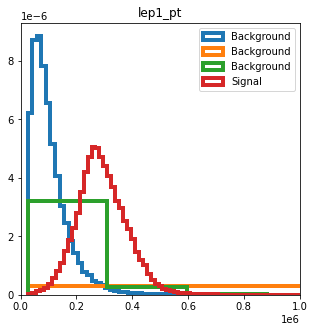

In [16]:
# First reconstructed lepton momentun
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 0, (0,1e6))

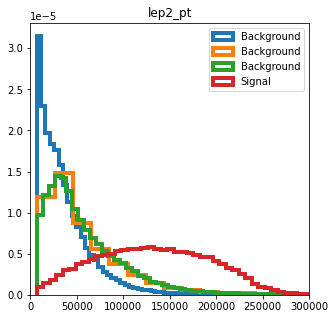

In [17]:
# Second reconstructed lepton momentum
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 1, (0,0.3e6))

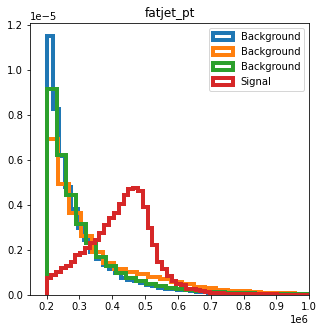

In [18]:
# Fatjet transverv
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 2, (0.15e6,1e6))

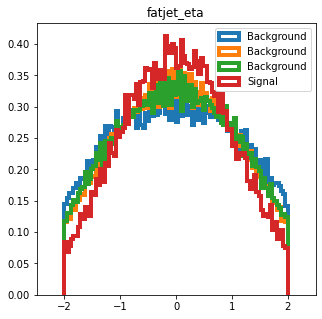

In [19]:
# eta of fatjet
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 3, (-2.5,2.5))

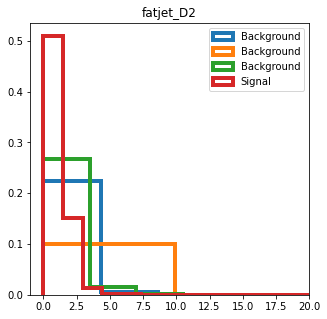

In [20]:
# D2 of fatjet
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 4, (-1,20))

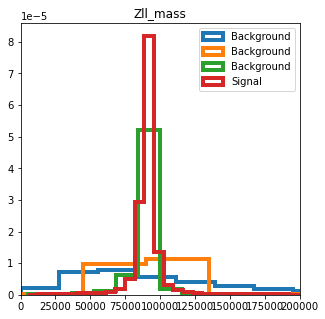

In [21]:
# invariant mass of reconstructed dilepton system
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 5, (0,0.2e6))

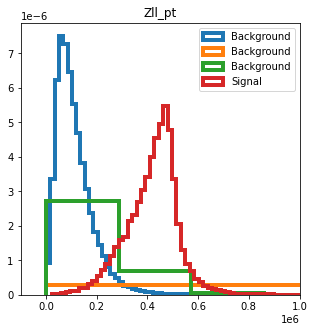

In [22]:
# transverse momentum of reconstructed dilepton system
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 6, (-1e5,1e6))

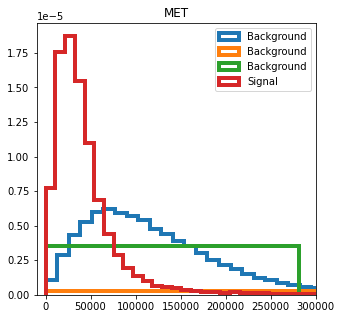

In [23]:
# transverse missing energy
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 7, (-1e4,0.3e6))

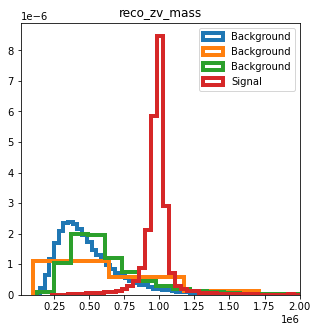

In [24]:
# invariant mass of reconstructed dilepton plus fat jet
plotting_function(top_plots, Zjets_plots, diboson_plots, ggH1000_plots, 8, (1e4,2e6))

We've plotted the 9 variables with background and signal.

## Exercise 2

a) Put all these dataframes together into a megaframe and shuffle, then create sample dataframe that is 50-50 signal and background.

In [25]:
# Merge everything
mega_frame = top_plots.append(Zjets_plots, ignore_index = True)
mega_frame = mega_frame.append(diboson_plots, ignore_index = True)
mega_frame = mega_frame.append(ggH1000_plots, ignore_index = True)



In [26]:
# Shuffle and print
mega_frame = mega_frame.sample(frac=1)

print(mega_frame)
print(len(top_plots) + len(Zjets_plots) + len(diboson_plots) + len(ggH1000_plots))

            lep1_pt     lep2_pt  fatjet_pt  fatjet_eta  fatjet_D2   Zll_mass  \
2748114  119667.305   85308.470  223924.48   -0.113159   2.881414  63647.254   
6190949  122507.370   21296.500  216090.12    0.446956   1.499996  84192.440   
4593397   79176.160   15822.904  302498.25    1.120519   1.259954  70442.520   
951810   150505.800   90627.340  270753.12    0.473573   1.622248  91332.690   
1605863   36948.688   33887.348  407760.60   -0.432783   1.831976  74660.080   
...             ...         ...        ...         ...        ...        ...   
5468651   72929.980   38208.395  317108.00    0.790267   3.820356  95595.860   
2219520   85202.650   16857.110  438178.00    1.647769   2.736590  76092.640   
943043   478887.560  336687.700  786518.75    0.308065   1.225252  93235.480   
3595393   48765.246   29316.828  274986.40    1.489248   2.028573  89173.695   
6387978   88058.690   55535.496  213614.31   -0.569320   2.744192  93326.990   

             Zll_pt        MET  reco_zv

6876972 rows, compared to full number of rows its the exact right length. Just checking that its valid. Now, take all signal values, check the length and collect a random assortment of background values equal to these signal values.

In [27]:
# signal and background dataframes
signal_df = mega_frame.loc[mega_frame["isSignal"]==1]
background_df = mega_frame.loc[mega_frame["isSignal"]==0]

In [28]:
print(signal_df)
print(background_df)

           lep1_pt     lep2_pt  fatjet_pt  fatjet_eta  fatjet_D2    Zll_mass  \
6827089  437899.88  252423.920  489852.28    0.785881   1.082393   92604.836   
6836405  348701.03  142133.580  464393.03    1.071393   0.998002   97916.300   
6840353  248822.22   64887.555  377067.70    1.656874   2.044376   91317.586   
6865850  280609.66  224128.480  367551.28    0.680489   0.893224   92066.180   
6864159  244050.17  135277.140  480677.22   -0.781995   0.904245  214176.360   
...            ...         ...        ...         ...        ...         ...   
6865937  223711.05  211301.580  412063.72   -1.137825   0.721132   94753.234   
6855327  346386.72  155390.660  365524.10    0.207371   2.706481   89071.670   
6869627  582677.30   74521.945  392548.12   -1.875909   0.612040   92458.610   
6873991  132256.27   55223.457  204591.83    0.252465   1.321431   93369.290   
6841181  284901.56  113379.090  379482.28    1.003265   0.747936   92894.600   

            Zll_pt         MET  reco_zv

Background is massive compared to the signal, background is already shuffled, so could just take a slice of it equal to number of signals, append it and then shuffle:

In [29]:
# Collect background equal to number of signal events
new_background_df = background_df.head(len(signal_df)).sample(frac=1)

In [30]:
# Append background to signal and shuffle
training_data = signal_df.append(new_background_df, ignore_index = True).sample(frac=1)

In [31]:
print(training_data)

         lep1_pt     lep2_pt   fatjet_pt  fatjet_eta  fatjet_D2    Zll_mass  \
12063   77749.95   75631.990   272660.80   -1.012463   0.934735   96065.280   
69238   57768.78   28626.744  1140303.50   -0.499292   1.320176   88973.320   
50745  414599.47    8250.416   414056.84    0.040780   2.656501   86275.250   
26790  258068.20  161112.420   368367.60    1.320067   0.868629   93044.734   
22285  342349.38  146434.420   469011.70    1.204365   1.146537  131789.620   
...          ...         ...         ...         ...        ...         ...   
67206  228056.88  126228.470   329046.56   -1.463158   1.619918   89330.555   
96873   97270.16   19303.102   247198.28   -1.248788   1.897675   91282.140   
67671  152570.00   45714.457   211347.90   -1.955056   1.805330   82071.610   
52196  496711.40  184428.390   592298.10   -0.592189   0.000000   93509.500   
8278   319453.60  164263.360   400137.88   -1.861255   1.588531   93087.830   

          Zll_pt        MET  reco_zv_mass  isSignal

Now the training data has been created we do part b)
We've already created a new dataframe with these 8 input and 1 output feature of interest. We will recycle dt_utils.featureplot from a previous checkpoint. We also have to choose different colours for signal and background? Lets figure it out

In [32]:
# import dt_utils
import dt_utils

In [33]:
training_data.iloc[:, :9]

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass
12063,77749.95,75631.990,272660.80,-1.012463,0.934735,96065.280,145316.66,28274.451,985089.60
69238,57768.78,28626.744,1140303.50,-0.499292,1.320176,88973.320,34201.45,75320.625,1215197.10
50745,414599.47,8250.416,414056.84,0.040780,2.656501,86275.250,419558.28,39479.043,847966.10
26790,258068.20,161112.420,368367.60,1.320067,0.868629,93044.734,412920.70,25726.123,1019299.94
22285,342349.38,146434.420,469011.70,1.204365,1.146537,131789.620,486822.10,37691.970,994285.60
...,...,...,...,...,...,...,...,...,...
67206,228056.88,126228.470,329046.56,-1.463158,1.619918,89330.555,349806.06,46571.350,783214.90
96873,97270.16,19303.102,247198.28,-1.248788,1.897675,91282.140,92061.65,53406.760,501740.00
67671,152570.00,45714.457,211347.90,-1.955056,1.805330,82071.610,188549.20,12361.851,455223.94
52196,496711.40,184428.390,592298.10,-0.592189,0.000000,93509.500,674727.56,11143.752,1480440.60


In [34]:
print(list(training_data.iloc[:, :8]))

['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET']


In [35]:
signal = np.array(training_data["isSignal"].tolist())
print(signal)

[1 0 0 ... 0 0 1]


First eight variables, dropping reco_zv_mass:

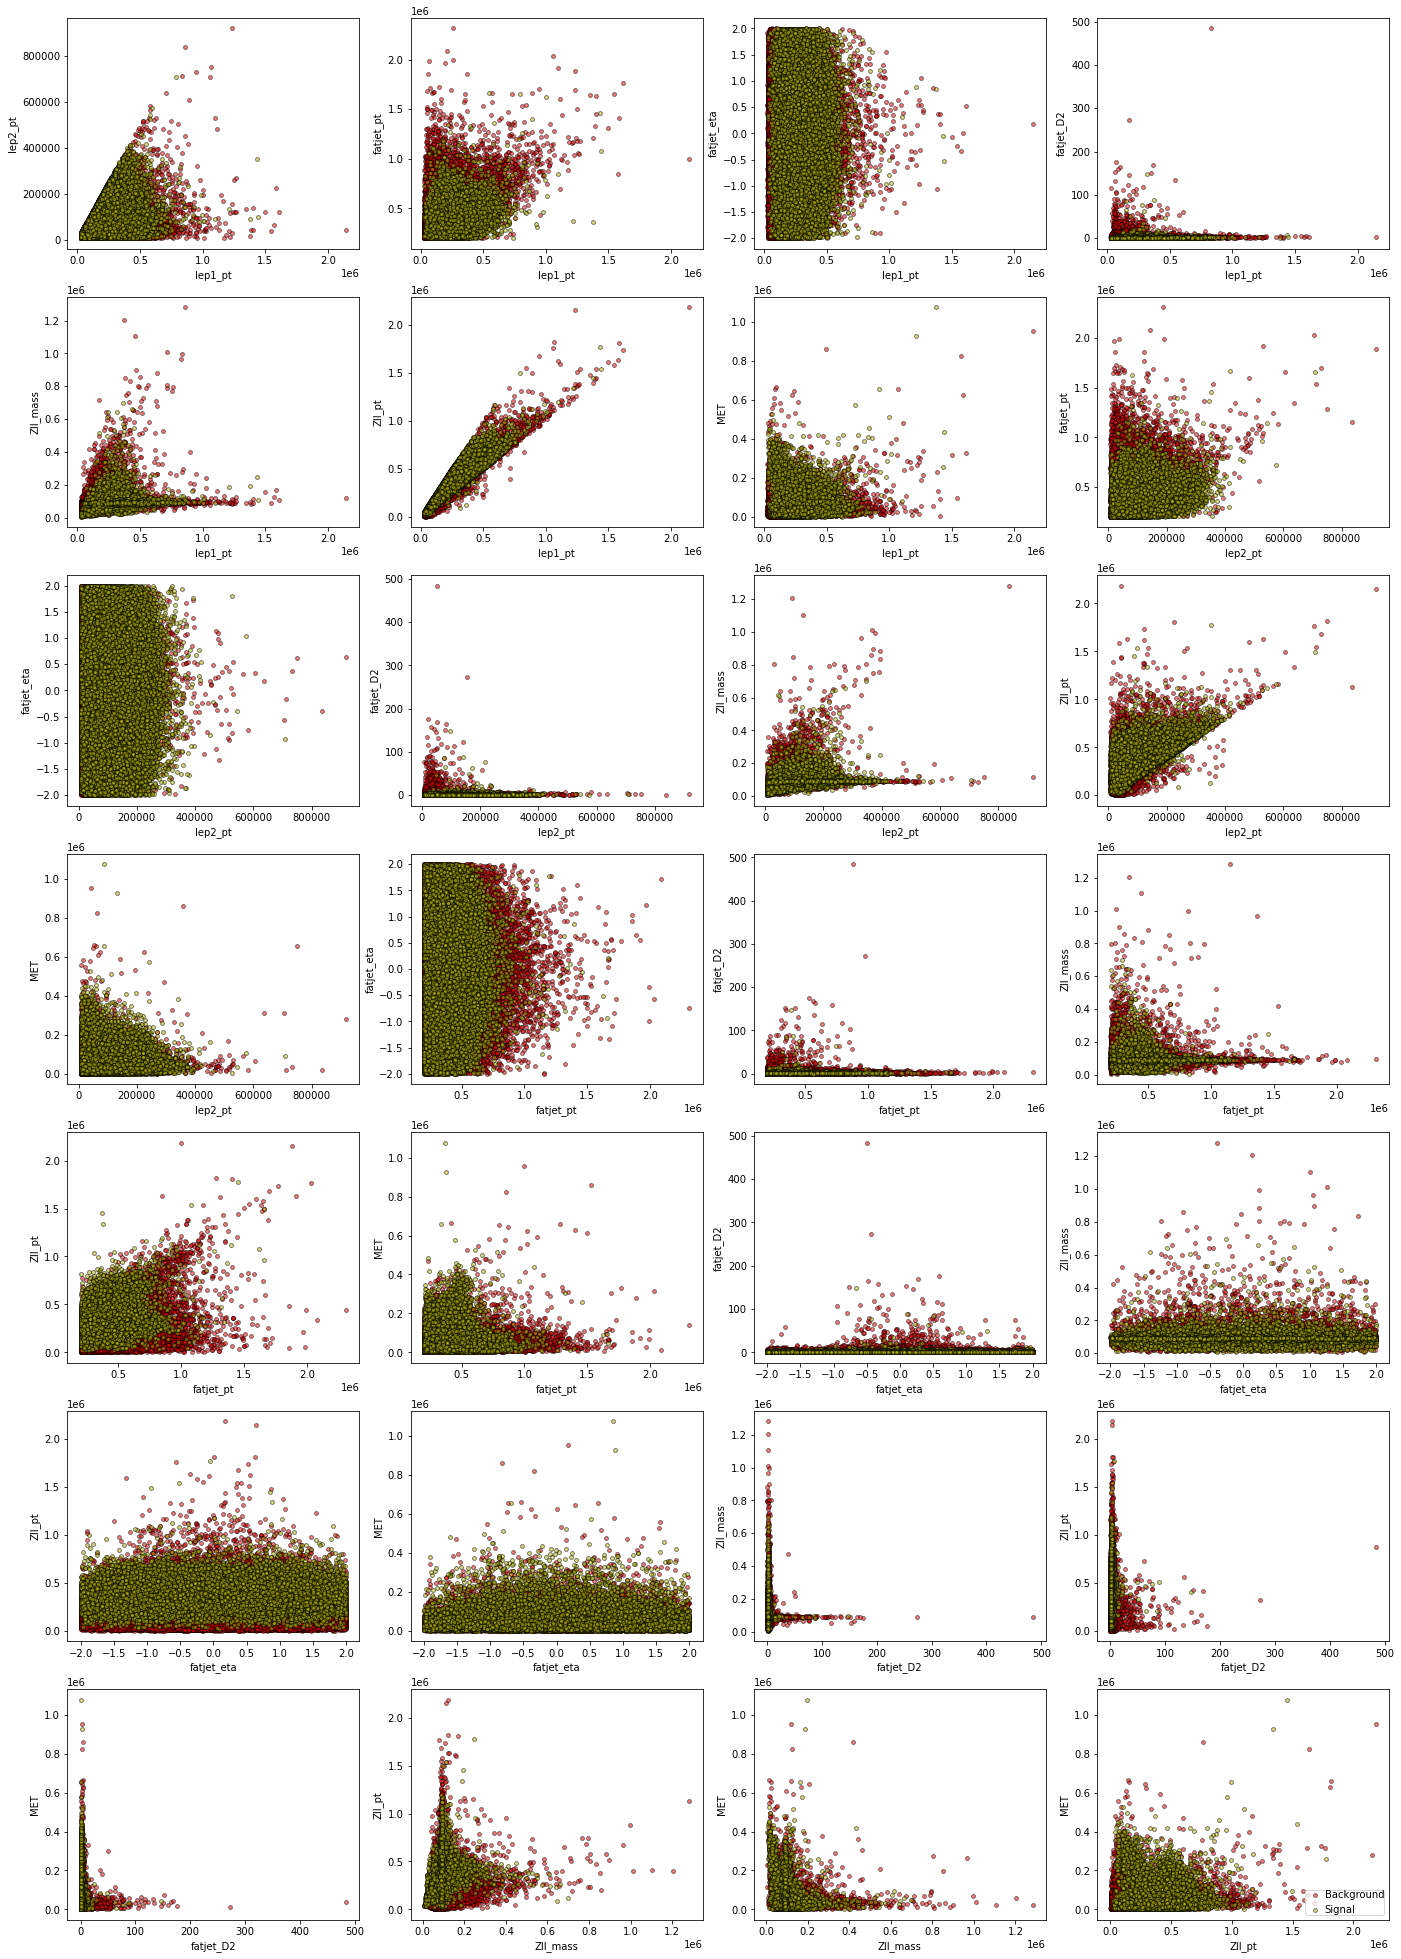

In [36]:
dt_utils.featureplot(training_data.iloc[:, :8].values, signal, n_classes = 2, c_names = ['Background', 'Signal'], t_names = list(training_data.iloc[:, :8]))

So we can see some correlation between certain variables, like Zll_pt and reco_zv_mass, and lep1/2_pt and Zll_pt. There are a couple more that could be useful in the future.

## Exercise 3

Perform input feature scaling, then split into two datasets, training and test.


In [37]:
t_vals = training_data.iloc[:, :8].values

In [38]:
from sklearn import model_selection, preprocessing
sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(t_vals)
# set random seed
Answer_to_all_questions = 42
# train-test split of dataset
train_data , test_data , train_target , test_target = model_selection.train_test_split(\
input_data , signal , test_size =0.3 , random_state = Answer_to_all_questions)
# print the shapes
print( train_data.shape , train_target.shape , test_data.shape , test_target.shape )

(70018, 8) (70018,) (30008, 8) (30008,)


## Exercise 4

Write a function that creates flexlible NN models. Then try running the batch size of 500, 50 epochs and 20 nodes per layer, and extra_depth = 1 as a starting put. Put the result of the fir method call into a History object:

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

def my_model(num_inputs, num_nodes, extra_depth):
    # create model
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal', \
                   activation='relu'))
    model.add(Dropout(0.2))
    
    for i in range(extra_depth):
        # extra layers time, we'll make them the same as previous
        model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal', \
                   activation='relu'))
        model.add(Dropout(0.2))
        
    model.add(Dense(num_outputs, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

C:\Users\johnw\anaconda3\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\johnw\anaconda3\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\johnw\anaconda3\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\johnw\anaconda3\envs\daml\lib\site-packages\tensorflow\python\frame

In [40]:
# Lets run it with a batch size of 500, 50 epochs and 20 nodes per layer.
num_outputs = 1

model = my_model(8, 20, 1)
history = model.fit(train_data, train_target, batch_size = 500, epochs = 50, \
                   verbose=1, validation_data = (test_data, test_target))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 70018 samples, validate on 30008 samples
Epoch 1/50
70018/70018 [==============================] - 0s 7us/sample - loss: 0.4879 - acc: 0.8454 - val_loss: 0.3368 - val_acc: 0.8688
Epoch 2/50
70018/70018 [==============================] - 0s 4us/sample - loss: 0.3306 - acc: 0.8717 - val_loss: 0.3035 - val_acc: 0.8778
Epoch 3/50
70018/70018 [==============================] - 0s 4us/sample - loss: 0.3148 - acc: 0.8763 - val_loss: 0.2955 - val_acc: 0.8807
Epoch 4/50
70018/70018 [==============================] - 0s 4us/sample - loss: 0.3098 - acc: 0.8794 - val_loss: 0.2925 - val_acc: 0.8829
Epoch 5/50
70018/70018 [==============================] - 0s 4us/sam

Plot the val accuracy and loss to plot and evolution of our model

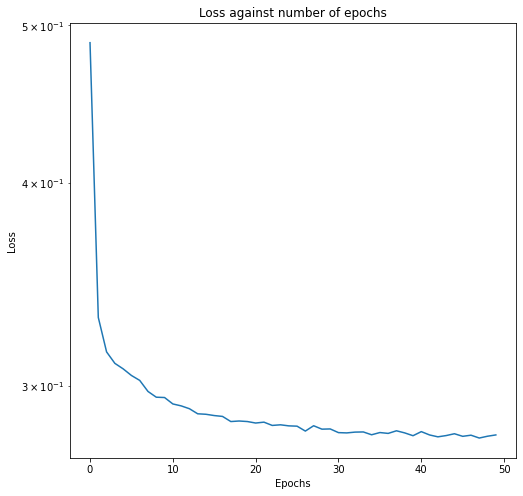

In [41]:
# plot loss
plt.figure(figsize = (8,8))
plt.plot(history.history["loss"])
plt.yscale('log')
plt.title("Loss against number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

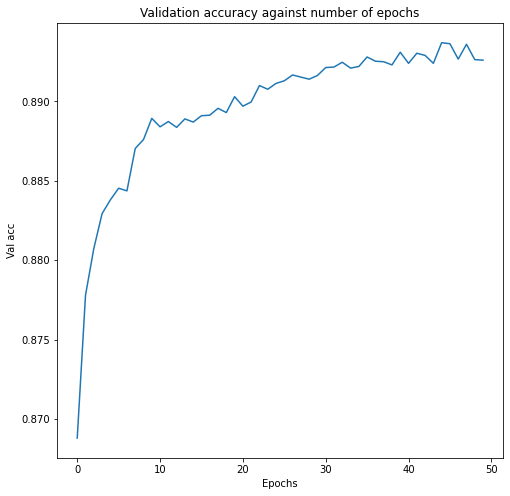

In [42]:
# plot val acc
plt.figure(figsize = (8,8))
plt.plot(history.history["val_acc"])
#plt.yscale('log')
plt.title("Validation accuracy against number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Val acc")
plt.show()

## Exercise 5

Try the new method to determine the try and find the batch size and number of epochs that increases val_acc to 95%. Also include reco_zv_mass

In [43]:
# Using reco_zv_mass as well
t_vals = training_data.iloc[:, :9].values
# get data
sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(t_vals)
# set random seed
Answer_to_all_questions = 42
# train-test split of dataset
train_data , test_data , train_target , test_target = model_selection.train_test_split(\
input_data , signal , test_size =0.3 , random_state = Answer_to_all_questions)
# print the shapes
print( train_data.shape , train_target.shape , test_data.shape , test_target.shape )

(70018, 9) (70018,) (30008, 9) (30008,)


In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# setting callbacks (early stop at 10 epochs of iterative results, save best model)
callbacks = [EarlyStopping(verbose=True, patience=10, monitor='val_acc'), ModelCheckpoint('good_model.h5', monitor='val_acc', verbose = 0, save_best_only=True, mode='max')]


In [45]:
num_inputs = 9
# Function that allows you to control number of layers and nodes and plots the history.
def model_tester(epochs, nodes, extra_depth, batch_size):
    model = my_model(num_inputs, nodes, extra_depth)
    
    
    history = model.fit(train_data, train_target, batch_size = batch_size, epochs=epochs, \
                    verbose = 0, validation_data=(test_data, test_target), callbacks=callbacks)
    
    # plot val acc
    plt.figure(figsize = (8,8))
    plt.plot(history.history["val_acc"])
    #plt.yscale('log')
    plt.title("Validation accuracy against number of epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Val acc")
    plt.show()
    
    print("Final validation accuracy: {:.2f}".format(max(history.history['val_acc'])))
    
    return history

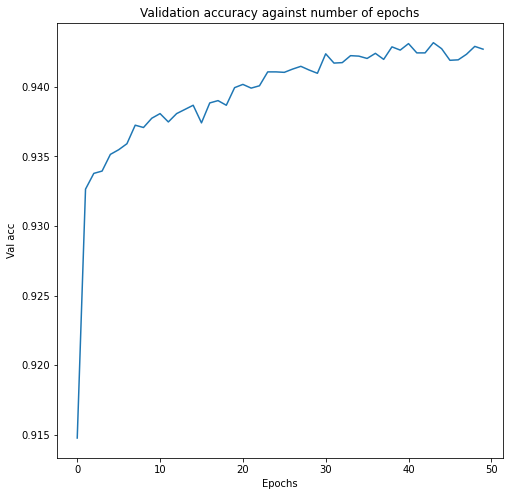

Final validation accuracy: 0.94


In [46]:
history = model_tester(50, 25, 2, 400)

Epoch 00053: early stopping


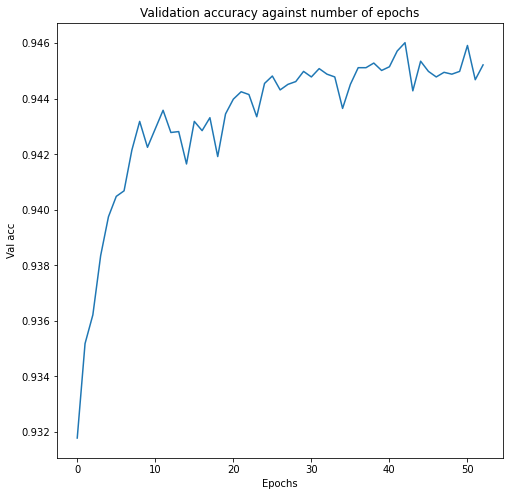

Final validation accuracy: 0.95


In [47]:
history = model_tester(75, 35, 4, 200)

0.95 validation accuracy! Lets hope it wasnt overwritten somewhere.

## Exercise 6

Predicted categories for the test data, and make confusion matrix for these values (signal or background)

In [58]:
# Load the model again because of the functionality of above not passing it out (sorry)
num_inputs = 9
nodes = 35
extra_depth = 4
batch_size = 200
epochs = 75
model = my_model(num_inputs, nodes, extra_depth)
history = model.fit(train_data, train_target, batch_size = batch_size, epochs=epochs, \
                    verbose = 0, validation_data=(test_data, test_target), callbacks=callbacks)

Epoch 00024: early stopping


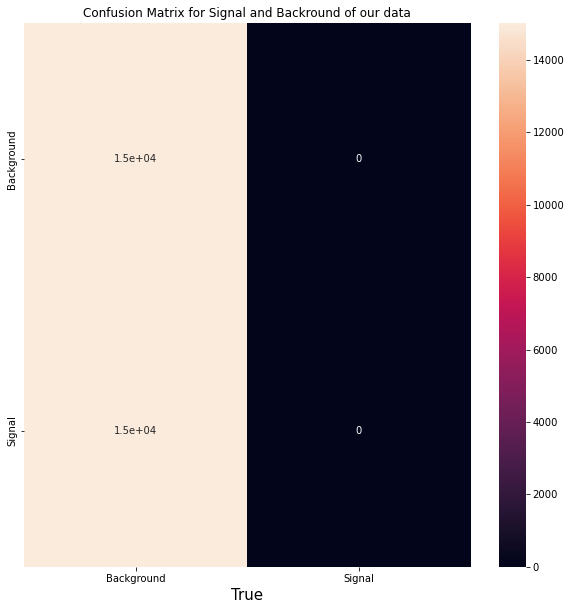

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
#from tensorflow import keras

#model = keras.models.load_model('good_model.h5')

# As model should be the last one produced above, will use to predict
predict_data = model.predict(test_data)
max_pred = np.argmax(predict_data, axis = 1)

matrix = confusion_matrix(test_target, max_pred)

df_cm = pd.DataFrame(matrix, index = ["Background", "Signal"], columns = ["Background", "Signal"])

plt.figure(figsize = (10,10))
plt.title("Confusion Matrix for Signal and Backround of our data")

sns.heatmap(df_cm, annot=True)
plt.xlabel("Predicted", fontsize =15)
plt.xlabel("True", fontsize =15)
plt.savefig("confmatsigback.png")
plt.show()

This appears to not be working...I dont have time to make it work. Sorry!